In [19]:
import numpy as np

#low_isc = np.load('S4B2/Generated_Data/low_isc_averaged_with_cov.npz')['low_isc_averaged']
#high_isc['high_isc_averaged'] low_isc
high_isc = np.load('/users/local/Venkatesh/Generated_Data/indiv_cov/high_isc_averaged_with_cov_9999.npz')['high_isc_averaged']
plot_high = dict() 
for m in range(360):
    hm = np.triu(np.corrcoef(np.array(high_isc)[:,m,:])) #high_isc['high_isc_averaged']
    
    iscs = list()
    for i in range(9):
         #iscs.append(hm[i][i+1:])
         #plot_high[m] = np.hstack(iscs)
         iscs.append(np.sum(hm[i][i+1:])/len((hm[i][i+1:])))
    plot_high[m] = iscs
    #plot_high.append(sum(iscs)/ sum(np.arange(10)))

In [ ]:

low_isc = np.load('/users/local/Venkatesh/Generated_Data/indiv_cov/low_isc_averaged_with_cov_9999.npz')['low_isc_averaged']
plot_low = dict()
for m in range(360):
    hm = np.triu(np.corrcoef(np.array(low_isc)[:,m,:])) #corrcoef and take only the upper half of the matrix

    iscs = list() #to store row-wise results
    for i in range(9): # Loop through each of the 9 rows
        #iscs.append(hm[i][i+1:]) #
        #plot_low[m] = np.hstack(iscs) # store ROI-wise
        iscs.append(np.sum(hm[i][i+1:])/len((hm[i][i+1:]))) #
    plot_low[m] = iscs # store ROI-wise
#plot_low.keys() = ROIs & plot_low.values() = 9 correlations per ROI

In [32]:
for i in range(1):
    print(plot_low[i][i])

[ 0.14276644  0.30204193  0.13159519 -0.2207433  -0.33548841  0.0687783
  0.03356488 -0.05397965  0.56059726]


In [14]:
from scipy import stats
ttest = list()
tvalues = list()

for i in range(360):
    ttest.append(stats.ttest_rel(plot_high[i],plot_low[i])[1])
    tvalues.append(stats.ttest_rel(plot_high[i],plot_low[i])[0])

In [15]:
zeroed_for_rois = np.zeros(shape=(1,360))
zeroed_for_rois [:,np.where(np.array(ttest) <= 0.05)] = np.array(tvalues)[np.where(np.array(ttest) <= 0.05)]


zeroed_for_rois_pvalue = np.zeros(shape=(1,360))
zeroed_for_rois_pvalue [:,np.where(np.array(ttest) <= 0.05)] = np.array(ttest)[np.where(np.array(ttest) <= 0.05)]


In [16]:

rois = np.load('/homes/v20subra/S4B2/GSP/hcp/regions.npy')
labels = [roi[1] for roi in rois]
np.array(labels)[np.where(np.array(ttest) <= 0.05)]


array(['Visual1', 'Visual2', 'Visual2', 'Visual2', 'Somatomotor',
       'Somatomotor', 'Visual2', 'Dorsal-atten', 'Posterior-Mu',
       'Posterior-Mu', 'Posterior-Mu', 'Somatomotor', 'Somatomotor',
       'Somatomotor', 'Somatomotor', 'Cingulo-Oper', 'Default', 'Default',
       'Frontopariet', 'Cingulo-Oper', 'Cingulo-Oper', 'Cingulo-Oper',
       'Auditory', 'Cingulo-Oper', 'Language', 'Auditory', 'Default',
       'Default', 'Posterior-Mu', 'Frontopariet', 'Language', 'Visual2',
       'Cingulo-Oper', 'Visual2', 'Posterior-Mu', 'Posterior-Mu',
       'Auditory', 'Auditory', 'Visual1', 'Somatomotor', 'Cingulo-Oper',
       'Default', 'Frontopariet', 'Cingulo-Oper', 'Dorsal-atten',
       'Dorsal-atten', 'Posterior-Mu', 'Posterior-Mu', 'Posterior-Mu',
       'Posterior-Mu', 'Somatomotor', 'Cingulo-Oper', 'Somatomotor',
       'Somatomotor', 'Frontopariet', 'Posterior-Mu', 'Visual1',
       'Default', 'Dorsal-atten', 'Frontopariet', 'Cingulo-Oper',
       'Frontopariet', 'Posterior-M

In [17]:
np.array(tvalues)[np.where(np.array(ttest)<= 0.05)]

array([-2.30643829, -3.18835647, -2.4132653 , -2.37918352, -2.36788978,
       -2.38581518, -2.55903787, -3.11772583, -3.46579706, -5.34762691,
       -4.05789219, -2.5390186 , -2.41952534, -2.94303942, -3.73438968,
       -2.68301963, -3.73020987, -2.49853363, -6.35058229, -2.91541438,
       -2.81624472, -3.6303945 , -2.81257644, -3.99911673, -2.67334504,
       -2.59144216, -3.30730813, -3.0754763 , -2.36708696, -2.66644013,
       -2.5197638 , -2.94316704, -2.81044395, -3.07360447, -2.50606495,
       -2.64482532, -2.37442671, -2.79355007, -2.54043456, -3.78071932,
       -5.27696492, -2.63262157, -4.93853169, -3.56751925, -2.52220583,
       -3.28331165, -5.25684523, -4.32259025, -3.318984  , -2.44094285,
       -3.63349365, -3.51167853, -2.65530953, -4.62437514, -2.62710363,
       -2.31852589, -3.76370111, -2.89134968, -2.3536844 , -2.75147747,
       -2.60172356, -9.86366216, -4.10574132, -3.13702164, -2.51104933])

In [9]:
np.array(tvalues)[np.where(np.array(ttest)<= 0.05)]

array([-2.71015037, -2.3810561 ,  2.65459383, -3.67326057, -3.10235223,
        4.15149588,  2.47248189,  3.3399306 ,  2.59836652, -2.75874201,
       -2.75406294, -3.43125387, -2.35322401, -2.32309191])

In [18]:
dmn = np.zeros(shape=(1,360))
dmn[:,302] = 1
brain_plot(dmn,'Default',expand =False)

NameError: name 'brain_plot' is not defined

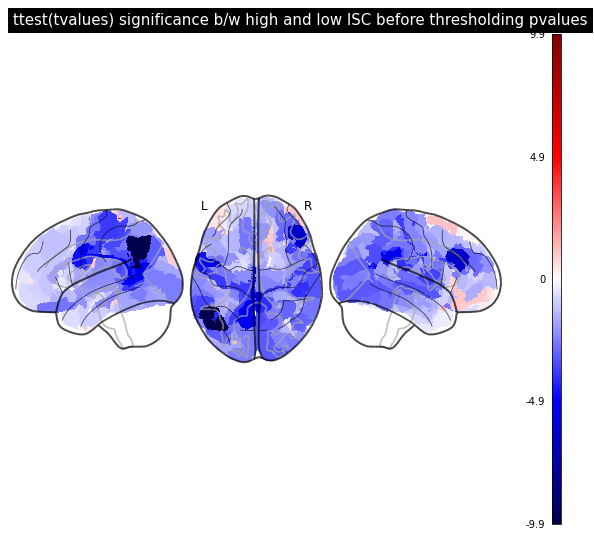

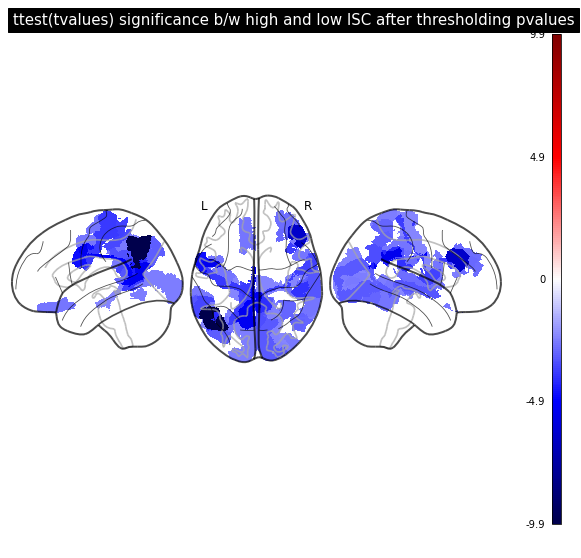

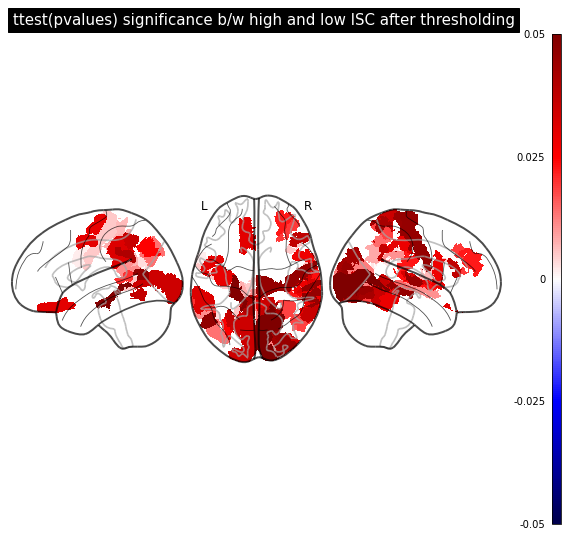

In [18]:
#np.savez('low_isc_averaged',low_isc = low_isc)
import matplotlib.pyplot as plt

from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj
import matplotlib.pyplot as plt

path_Glasser = '/homes/v20subra/S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)


#print(NiftiMasker.__doc__)
def brain_plot(data, title, expand):
    fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))

    signal=[]
    U0_brain=[]
    if expand:
        signal=np.expand_dims(data, axis=0) # add dimension 1 to signal array
    else:
        signal=data # add dimension 1 to signal array
    U0_brain = signals_to_img_labels(signal,path_Glasser,mnitemp['mask'])
    plotting.plot_glass_brain(U0_brain,title=title,colorbar=True,plot_abs=False,cmap='seismic',display_mode='lzr',symmetric_cbar=True,figure=fig,axes=ax)
    U0_brain.to_filename('ttest_significance_correlation_unthresholded_tvalues.nii.gz')

brain_plot(tvalues,'ttest(tvalues) significance b/w high and low ISC before thresholding pvalues', expand =True)
brain_plot(zeroed_for_rois,'ttest(tvalues) significance b/w high and low ISC after thresholding pvalues',expand =False)
brain_plot(zeroed_for_rois_pvalue,'ttest(pvalues) significance b/w high and low ISC after thresholding',expand =False)


In [78]:
U0_brain.to_filename('ttest_significance_correlation_unthresholded_tvalues.nii.gz')

NameError: name 'U0_brain' is not defined

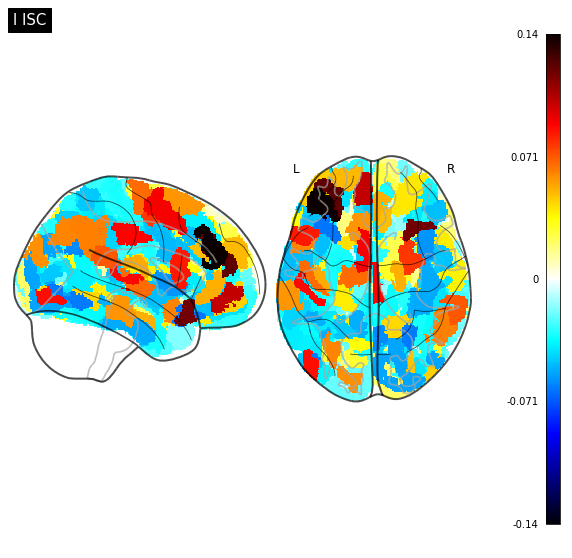

In [24]:
#np.savez('low_isc_averaged',low_isc = low_isc)
import matplotlib.pyplot as plt

from nilearn.regions import signals_to_img_labels  
# load nilearn label masker for inverse transform
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.datasets import fetch_icbm152_2009
from nilearn import image, plotting
from nilearn import datasets
from os.path import join as opj
import matplotlib.pyplot as plt

path_Glasser = 'S4B2/GSP/Glasser_masker.nii.gz'


mnitemp = fetch_icbm152_2009()
mask_mni=image.load_img(mnitemp['mask'])
glasser_atlas=image.load_img(path_Glasser)



fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))

signal=[]
U0_brain=[]
signal=np.expand_dims(np.array(plot), axis=0) # add dimension 1 to signal array
U0_brain = signals_to_img_labels(signal,path_Glasser,mnitemp['mask'])
plotting.plot_glass_brain(U0_brain,title='l ISC',colorbar=True,plot_abs=False,cmap='spring',display_mode='xz',figure=fig,axes=ax)



In [152]:
import seaborn as sns

In [175]:
def probe(vertices,data):

    plot = list()
    for m in tqdm.tqdm(range(vertices)):
        hm = np.triu(np.corrcoef(np.array(data)[:,m,:]))
        iscs = list()
        comp = [iscs.append(np.sum(hm[i][i+1:])) for i in range(9)]
        plot.append(sum(iscs)/ 45)
    return plot


### 20k vertices

In [111]:
low_isc_20k = np.load('S4B2/Generated_Data/low_isc_wo_average.npz')['low_isc_wo_average']
high_isc_20k = np.load('S4B2/Generated_Data/high_isc_wo_average.npz')['high_isc_wo_average']


In [176]:
l = probe(20484,low_isc_20k)

100%|██████████| 20484/20484 [1:53:59<00:00,  2.99it/s]


In [177]:
h = probe(20484,high_isc_20k)

100%|██████████| 20484/20484 [1:50:13<00:00,  3.10it/s]


In [160]:
q = [ 23, 102, 103, 106, 123, 172, 173, 174, 203, 282, 286, 303, 352,
        353, 354]

In [180]:
#np.savez('S4B2/Generated_Data/high_isc_20k_correlation.npz',high_isc_20k_correlation = h)

In [7]:
from data import surface_plot
from imp import reload 
import numpy as np
reload(surface_plot)
h = np.load('S4B2/Generated_Data/high_isc_20k_correlation.npz')['high_isc_20k_correlation']


surface_plot.plot(np.array(h),'high ISC',None,None,None)

FileNotFoundError: No such file or no access: '/brainnotation/tpl-fsaverage_den-10k_hemi-L_pial.surf.gii'

FileNotFoundError: No such file or no access: '/brainnotation/tpl-fsaverage_den-10k_hemi-R_pial.surf.gii'

ValueError: zero-size array to reduction operation fmin which has no identity

In [5]:
cd

/homes/v20subra
